<a href="https://colab.research.google.com/github/CM-007/DS_ASS/blob/main/AssNo04Q01(Delivery_time).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/delivery_time.csv')

# **Performing EDA**

In [3]:
#Rename  Columns Name Remove white space between words
data = data.rename(columns={
    "Delivery Time":"Delivery_Time",
    "Sorting Time":"Sorting_Time"
})

In [4]:
data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [20]:
data.shape

(21, 2)

In [5]:
# Information about data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [22]:
data.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# **Data Visualization**

<Axes: >

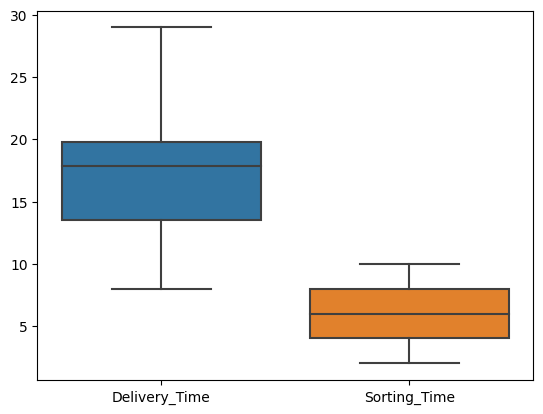

In [23]:
# Finding outliers
sns.boxplot(data)

From above boxplots , we can state that no outliers are present in the dataset.

# **Density Plot**

<ipython-input-18-8435a17ffa52>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Delivery_Time)


<Axes: xlabel='Delivery_Time', ylabel='Density'>

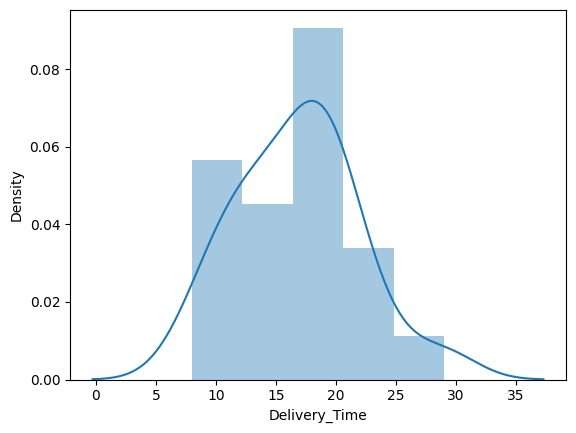

In [18]:
sns.distplot(data.Delivery_Time)

<ipython-input-19-df808c828aa4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Sorting_Time)


<Axes: xlabel='Sorting_Time', ylabel='Density'>

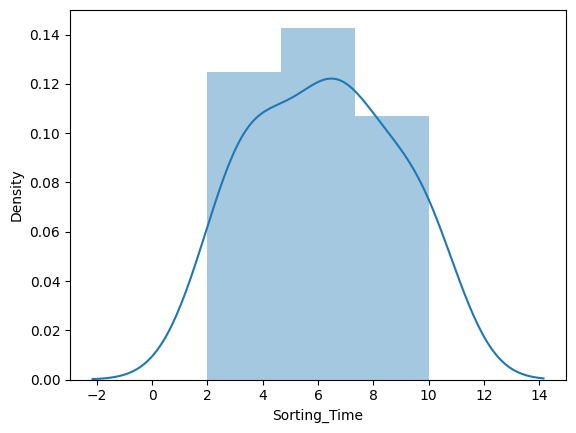

In [19]:
sns.distplot(data.Sorting_Time)

# Correlation

In [6]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


# Fitting Linear Regression Model

In [7]:
import statsmodels.formula.api as smf

model = smf.ols("Delivery_Time~Sorting_Time", data=data).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           3.98e-06
Time:                        11:51:44   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

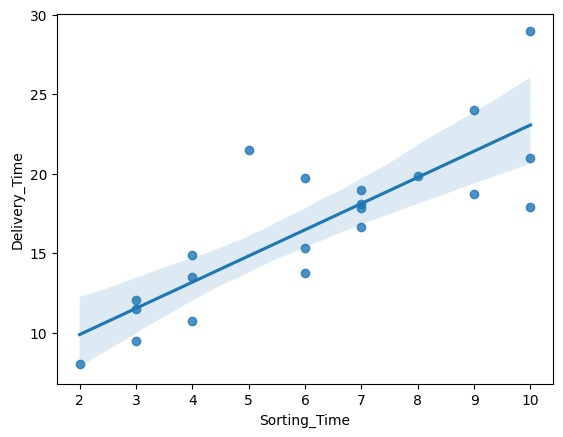

In [9]:
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=data)

In [10]:
# Coefficients are B0=Intercept and B1=Sorting_Time
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [11]:
print("***T Values :***\n",model.tvalues,'\n','***P Values :***\n',model.pvalues)

***T Values :***
 Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 ***P Values :***
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


p value < alpha --> Reject Null Hypothesis

# Model prediction

In [12]:
# Predict for sorting time is 21 and 4
newdata = pd.Series([21,4])
newdata

0    21
1     4
dtype: int64

In [13]:
pred_data = pd.DataFrame(newdata,columns=['Sorting_Time'])
pred_data

,Sorting_Time
0,21
1,4


Regression model

In [14]:
model.predict(pred_data)

0    41.212152
1    13.178814
dtype: float64